In [ ]:
# Option 1: Automatic detection (recommended for most users)
from photon_mosaic_demo.extractors import get_imaging_extractor

# This will automatically detect the correct format
imaging = get_imaging_extractor("C:/Users/ariellel/data/single-plane/neuron1_00001.tif", channel_name="Channel 1")

print(f"Image shape: {imaging.image_shape}")
print(f"Sampling rate: {imaging.sampling_frequency} Hz")
print(f"Number of frames: {imaging.get_num_samples()}")

c:\Users\ariellel\repos\photon-mosaic-demo\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Successfully loaded with ScanImageImagingExtractor
Image shape: [800 800]
Sampling rate: 19.423 Hz
Number of frames: 2073


In [2]:
# Get imaging data as numpy arrays
frames = imaging.get_series(start_frame=0, end_frame=10)
print(f"Shape of first 10 frames: {frames.shape}")
print(type(imaging.get_series(start_frame=0, end_frame=10)))  # Should be a numpy array
# Get all timing information
times = imaging.get_times()
print(f"Timestamps: {times[:5]}...")  # First 5 timestamps

Shape of first 10 frames: (10, 800, 800)
<class 'numpy.ndarray'>
Timestamps: [0.         0.05148535 0.1029707  0.15445606 0.20594141]...


In [3]:
# Load all frames for visualization
import numpy as np
import matplotlib.pyplot as plt

num_frames = imaging.get_num_samples()
print(f"Loading {num_frames} frames...")

# Load all frames (or subset for large files)
frames_to_show = imaging.get_series(start_frame=0, end_frame=num_frames)
print(f"Loaded frames shape: {frames_to_show.shape}")

Loading 2073 frames...
Loaded frames shape: (2073, 800, 800)


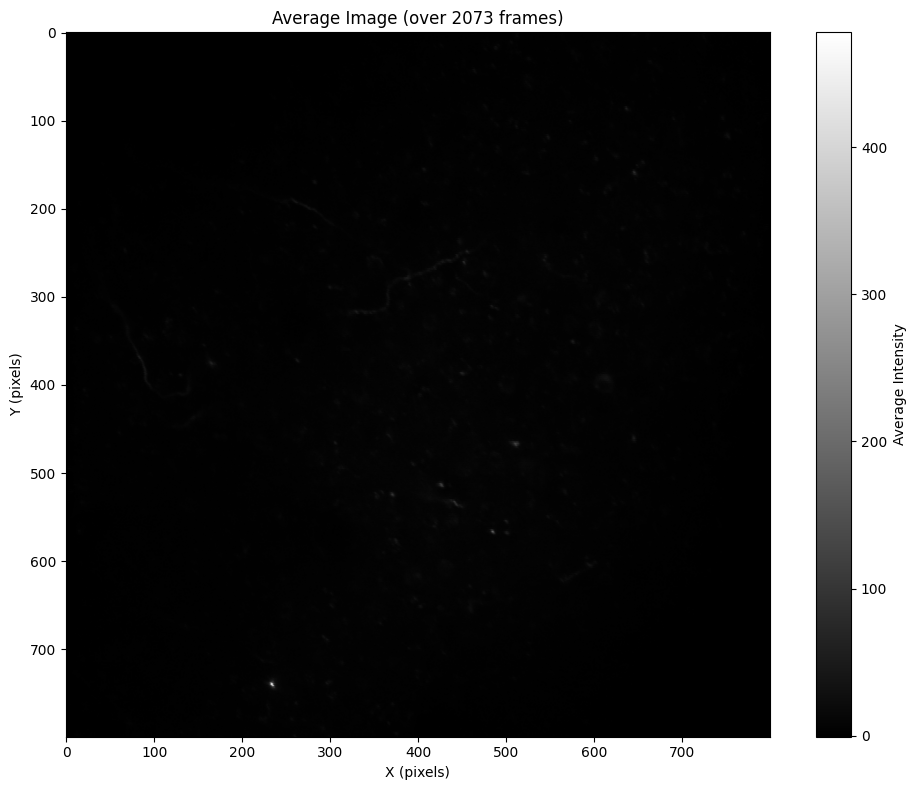

Averaged image shape: (800, 800)
Intensity range: [-0.8, 478.1]


In [4]:
# Create an averaged image from all frames
averaged_image = imaging.get_average_image(frames_to_show, axis=0)

# Display the averaged image
plt.figure(figsize=(10, 8))
plt.imshow(averaged_image, cmap='gray')
plt.colorbar(label='Average Intensity')
plt.title(f"Average Image (over {num_frames} frames)")
plt.xlabel("X (pixels)")
plt.ylabel("Y (pixels)")
plt.tight_layout()
plt.show()

print(f"Averaged image shape: {averaged_image.shape}")
print(f"Intensity range: [{averaged_image.min():.1f}, {averaged_image.max():.1f}]")